# Processing GOCCP files
Initial test of computing time and file dimensions.

## Largely new metric testing

### Add paths to run locally or off NIRD

In [1]:
import sys
# Add common resources folder to path
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/Common/")
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    ccrs, metrics, Iterable
    )

from functions import (
    masked_average, add_weights, sp_map,
    season_mean, get_dpm, leap_year, share_ylims
    )

from classes import SatComp_Metric

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Check running location and adjust working directory appropriately.

In [2]:
host = os.uname()[1]
if 'jupyter' in host.split('-'): # Check if running on NIRD through the Jupyter Hub
    print('Running through MC2 Jupyter Hub')
    model_dir = '/mnt/mcc-ns9600k/jonahks/'
    os.chdir(model_dir)

else:  # Assume that we're running on a local machine and mounting NIRD
    print('Running on %s, attempting to mount ns9600k/jonahks/ from NIRD' % str(host))
    os.system('fusermount -zu ~/drivemount/')  # unmount first
    os.system('sshfs jonahks@login.nird.sigma2.no:"p/jonahks/" ~/drivemount/')    # Calling mountnird from .bashrc doesn't work
    os.chdir('/home/jonahks/drivemount/')
    save_dir = '~/DATAOUT/'
    save_to = os.path.expanduser(save_dir)

output_dir = 'figures/'
case_dir = 'satcomp/'   # inconsistent label compared to jupy_test

# Check that each important directory can be accessed:    
access_paths = os.path.exists(output_dir) and os.path.exists(case_dir)
print('Can access all directory paths:', access_paths)

Running through MC2 Jupyter Hub
Can access all directory paths: True


## Try to get this to work!

In [3]:
os.listdir(case_dir)

['20200327_132118_singleparam_noresm2satcomp_wbf_1_inp_1',
 '20200414_205148_singleparam_cam61satcomp_wbf_0.2_inp_0.3',
 '20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1',
 'unused',
 '20200414_205148_singleparam_cam61satcomp_wbf_1_inp_0.05']

In [39]:
bob = SatComp_Metric(case_dir)

Loading GOCCP data.
GOCCP data loaded.


In [40]:
bob.add_case('20200327_132118_singleparam_noresm2satcomp_wbf_1_inp_1')
bob.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1')
bob.add_case('20200414_205148_singleparam_cam61satcomp_wbf_0.2_inp_0.3')
bob.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_0.05')

Trying to load concatenated file for 20200327_132118_singleparam_noresm2satcomp_wbf_1_inp_1
20200327_132118_singleparam_noresm2satcomp_wbf_1_inp_1 load successfully.
Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1
20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1 load successfully.
Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_0.2_inp_0.3
20200414_205148_singleparam_cam61satcomp_wbf_0.2_inp_0.3 load successfully.
Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_1_inp_0.05
20200414_205148_singleparam_cam61satcomp_wbf_1_inp_0.05 load successfully.


/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.p

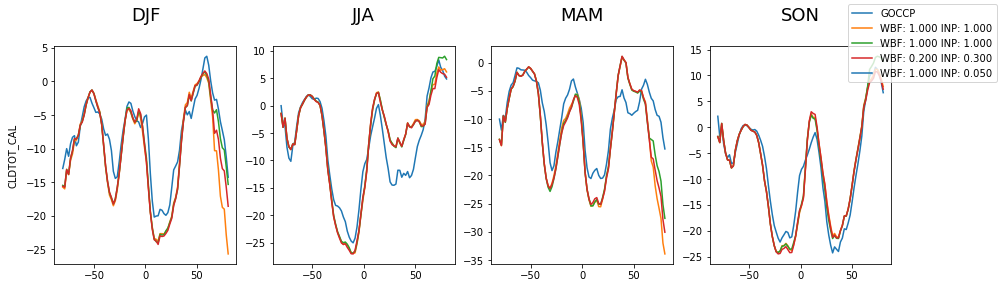

In [30]:
bob.plot1D('CLDTOT_CAL', seasonal=True, bias=True)

/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.p

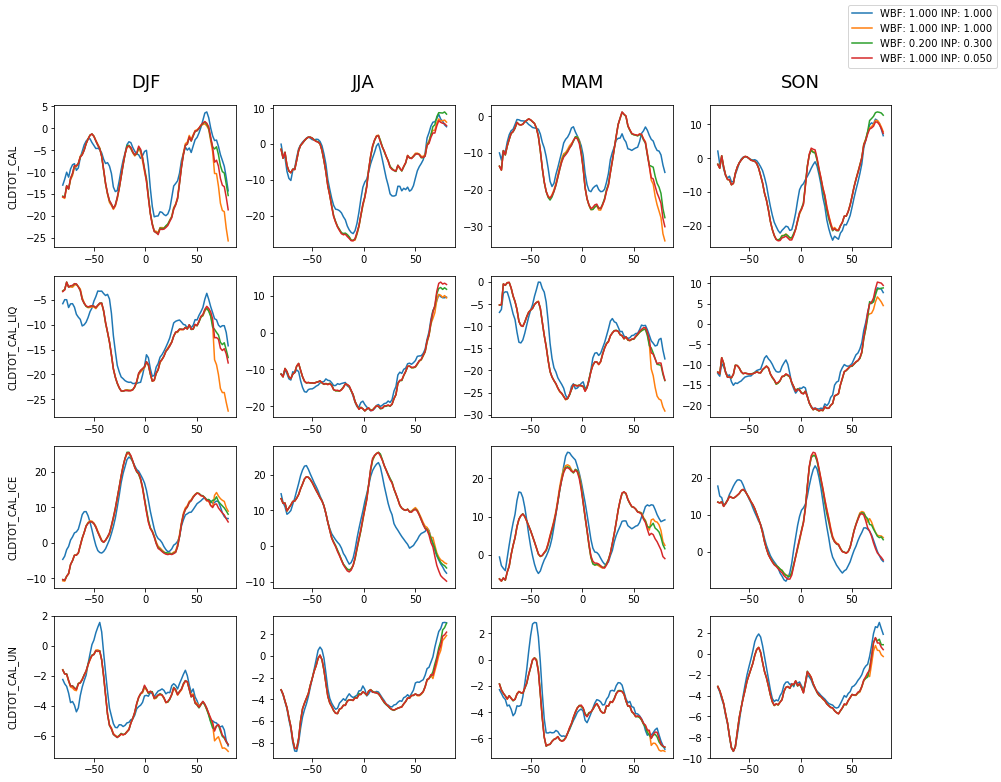

In [31]:
bob.plot1D('CLDTOT_CAL', layers=True, seasonal=True, bias=True)

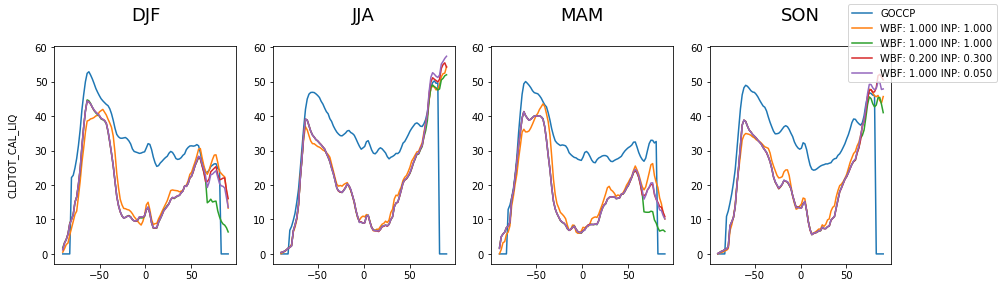

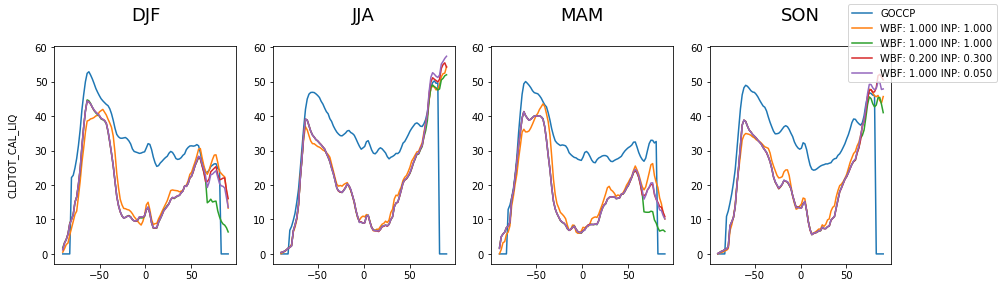

In [70]:
bob.plot1D('CLDTOT_CAL_LIQ', seasonal=True)

/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.p

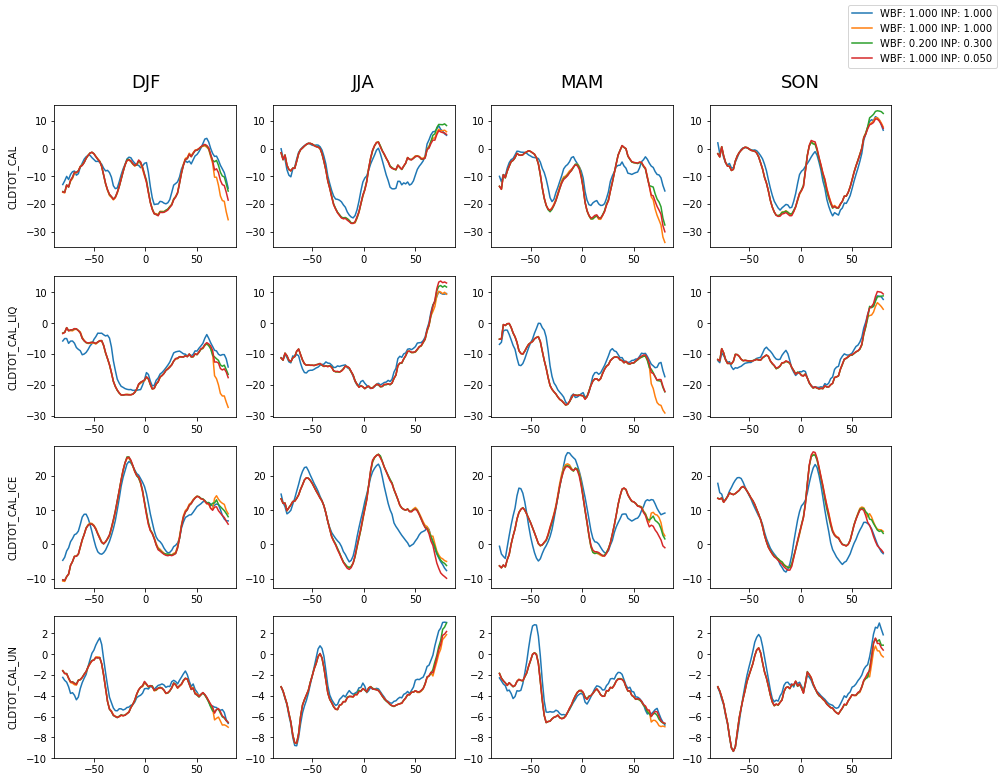

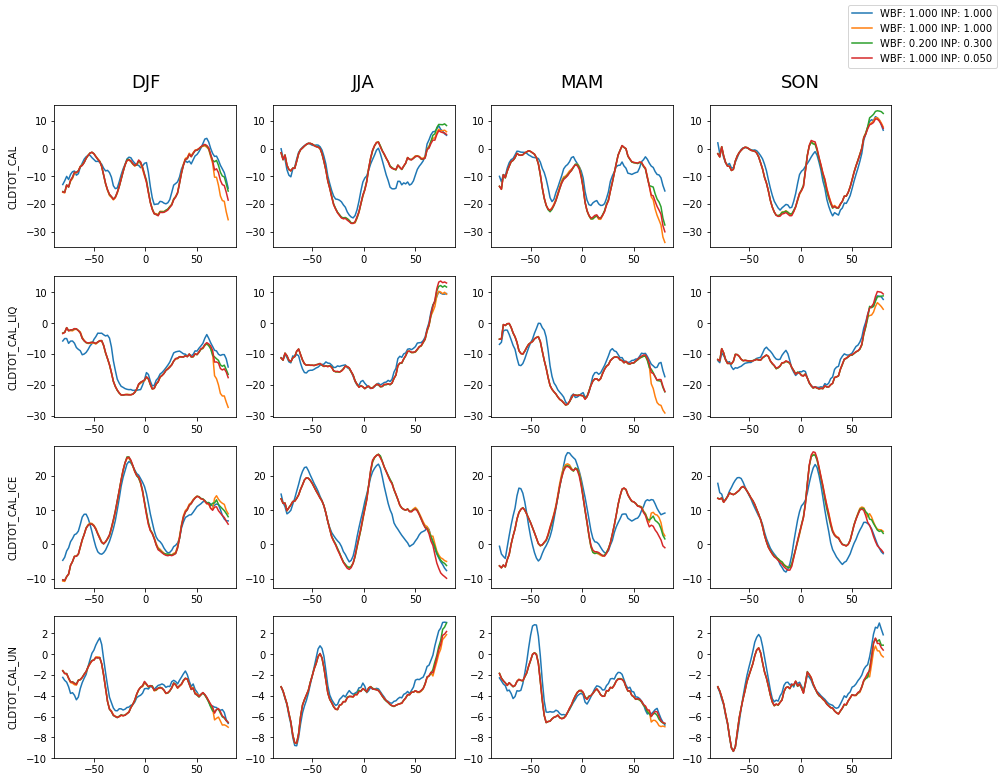

In [71]:
bob.plot1D('CLDTOT_CAL', seasonal=True, layers=True, bias=True)

/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.p

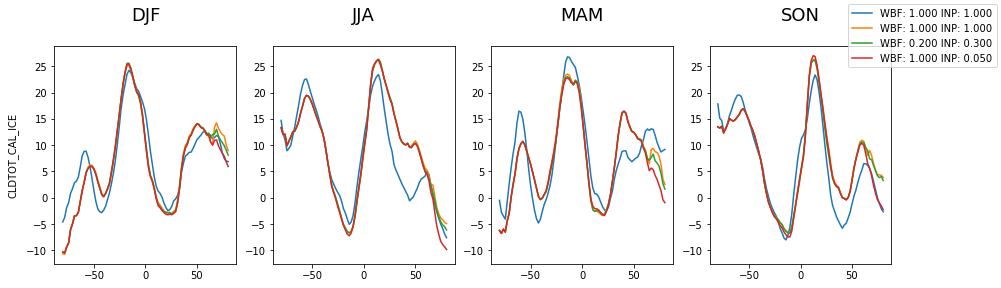

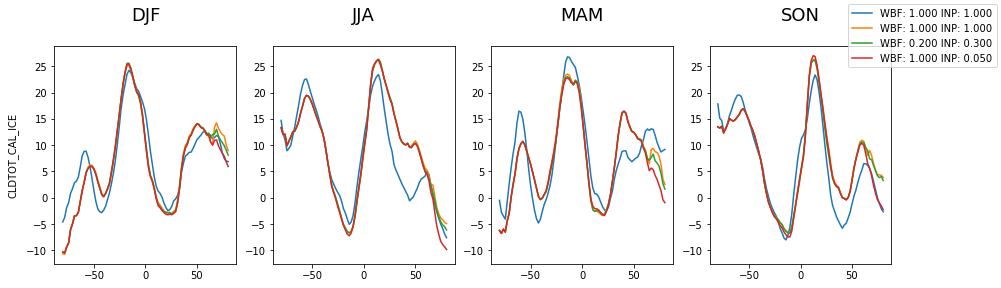

In [62]:
bob.plot1D('CLDTOT_CAL_ICE', seasonal=True, bias=True)

/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.p

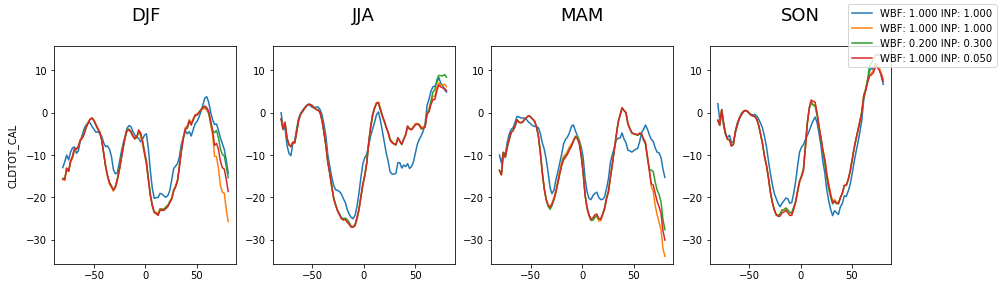

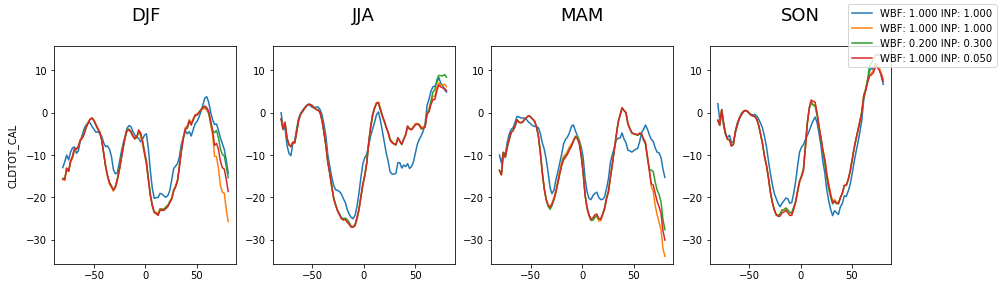

In [61]:
bob.plot1D('CLDTOT_CAL', seasonal=True, bias=True)

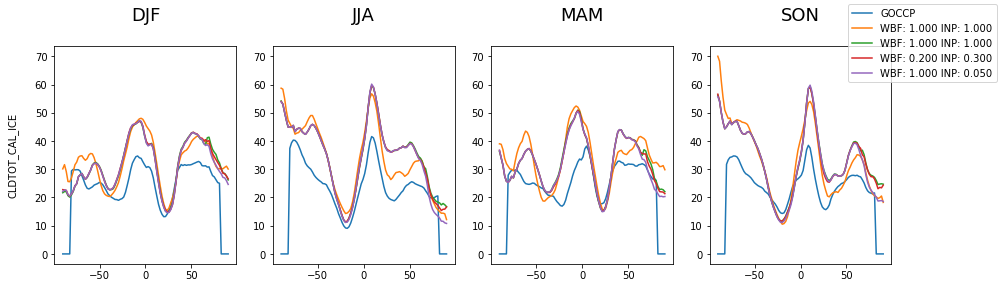

In [60]:
doe = bob.plot1D('CLDTOT_CAL_ICE', seasonal=True)

In [51]:
xx = doe.get_axes()

In [56]:
newxx = share_ylims(xx)

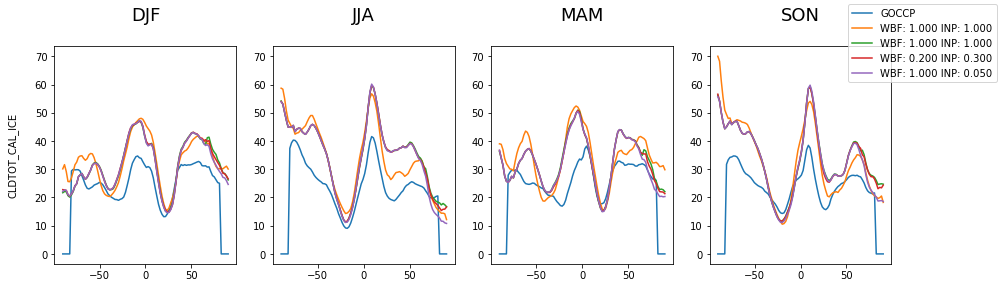

In [57]:
doe

In [62]:
case = bob.get_case('20200327_132118_singleparam_noresm2satcomp_wbf_1_inp_1')

In [63]:
var = case.case_da['CLDLOW_CAL_LIQ']

In [64]:
var

<xarray.DataArray 'CLDLOW_CAL_LIQ' (time: 48, lat: 96, lon: 144)>
array([[[ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        ...,
        [45.88996 , 43.159966, ..., 45.94735 , 45.060482],
        [47.79454 , 47.783512, ..., 47.79454 , 47.79454 ]],

       [[ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        ...,
        [73.884346, 73.73941 , ..., 74.45133 , 72.7919  ],
        [79.02926 , 79.063446, ..., 79.041046, 79.041046]],

       ...,

       [[ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.177515, ...,  0.      ,  0.      ],
        ...,
        [13.18344 , 15.51455 , ..., 14.470053, 13.009615],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ]],

       [[ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.084388,  0.      ],
        ...,
        [23.204344, 24.264984, ..., 20.971624, 22.397728],
        [22.468092, 22.468092, ..., 22.468092, 22.468092]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2009-07-01 2009-08-01 ... 2013-06-01
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:     Lidar Low-level Liquid Cloud Fraction
    units:         percent
    cell_methods:  time: mean

In [59]:
lil = bob.goccp_data

In [66]:
lil['CLDLOW_CAL_LIQ']

<xarray.DataArray 'CLDLOW_CAL_LIQ' (time: 48, lat: 90, lon: 180)>
dask.array<mul, shape=(48, 90, 180), dtype=float32, chunksize=(1, 90, 180), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time     (time) datetime64[ns] 2009-06-15T14:04:06.093750016 ... 2013-05-12T22:48:16.875000

/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


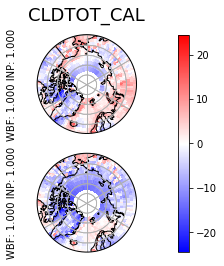

In [21]:
pltp = bob.plot2D('CLDTOT_CAL', projection='Arctic', bias=True)

CLDTOT_CAL


/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


CLDTOT_CAL_LIQ


/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


CLDTOT_CAL_ICE


/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


CLDTOT_CAL_UN


/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


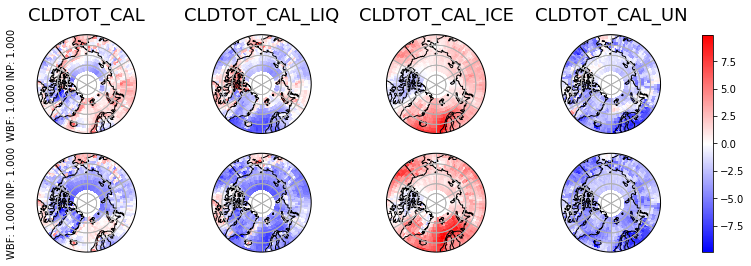

In [14]:
pltp = bob.plot2D('CLDTOT_CAL', layers=True, bias=True, projection="Arctic")

/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.p

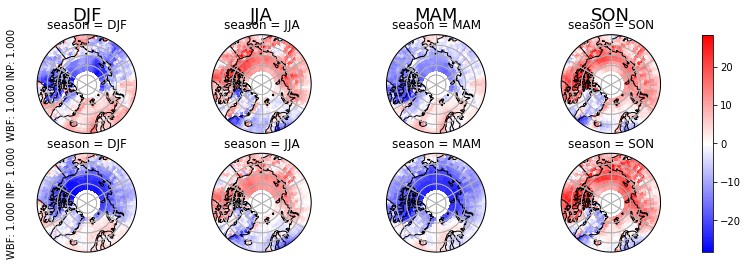

In [17]:
pltt= bob.plot2D('CLDTOT_CAL', projection='Arctic', seasonal=True, bias=True)

In [294]:
css = bob.get_cases()

[autoreload of classes failed: Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/opt/conda/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/opt/conda/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/Common/classes.py", line

In [275]:
too += ['hi']

In [276]:
print(too)

['hi', 'hi']


CLDTOT_CAL_LIQ


/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


CLDTOT_CAL_ICE


/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


CLDTOT_CAL_UN


/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


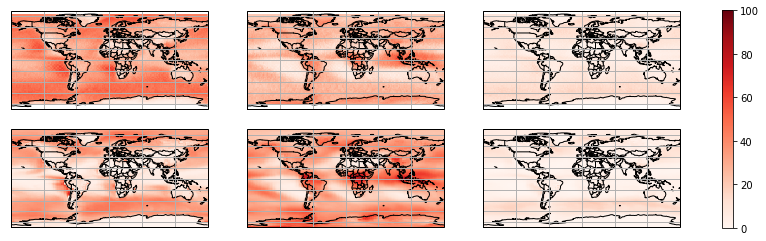

In [244]:
fig1 = bob.plot2D('CLDTOT_CAL', layers=True)#, projection='Arctic')

In [234]:
axes1 = fig1.get_axes()

In [241]:
axes1[0].annotate('hi',(0.5,0.5), fontsize=12)

Text(0.5,0.5,'hi')

In [247]:
fig1.text(0.5,0.5,'hi')

Text(0.5,0.5,'hi')

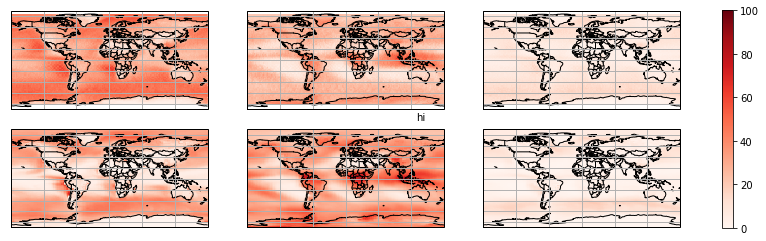

In [248]:
fig1

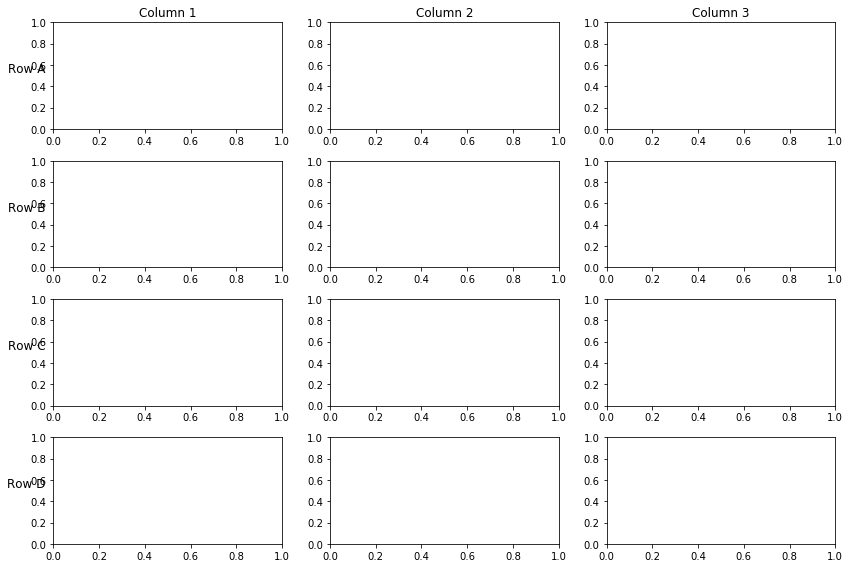

In [249]:
cols = ['Column {}'.format(col) for col in range(1, 4)]
rows = ['Row {}'.format(row) for row in ['A', 'B', 'C', 'D']]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 8))

for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=0, size='large')

fig.tight_layout()
plt.show()

In [79]:
bob.goccp_data['CLDLOW_CAL_UN']

<xarray.DataArray 'CLDLOW_CAL_UN' (time: 48, cat1: 6, lat: 90, lon: 180)>
dask.array<mul, shape=(48, 6, 90, 180), dtype=float32, chunksize=(1, 6, 90, 180), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time     (time) datetime64[ns] 2009-06-15T14:04:06.093750016 ... 2013-05-12T22:48:16.875000
Dimensions without coordinates: cat1

In [86]:
lowun = bob.goccp_data['CLDLOW_CAL_UN'].mean(dim='time')

/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


AttributeError: Unknown property cmap

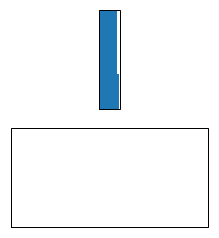

In [76]:
bob.plot2D('CLDLOW_CAL_UN')

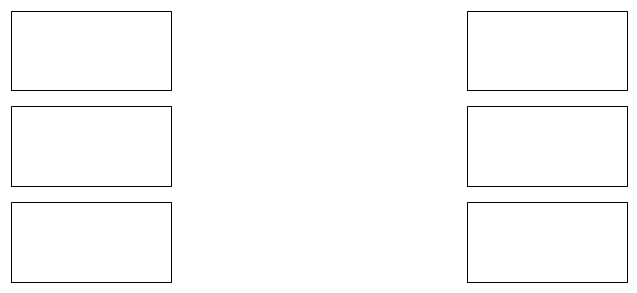

In [55]:
fig, axes = sp_map(nrows=3, ncols=2, figsize=[15,2*2+1])

In [66]:
axes.shape

(3, 2)

In [67]:
axes.transpose()

array([[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7f98674a8630>,
      dtype=object)

In [63]:
subaxes = axes[:,0]

In [64]:
subaxes[0]

In [12]:
lilbob = bob.get_case('20200327_132118_singleparam_noresm2satcomp_wbf_1_inp_1')

In [13]:
lilbob.case_da

<xarray.Dataset>
Dimensions:             (bnds: 2, cosp_ht: 40, isotherms_mpc: 9, lat: 96, lev: 32, lon: 144, time: 48)
Coordinates:
  * time                (time) datetime64[ns] 2009-07-01 ... 2013-06-01
  * lat                 (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon                 (lon) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lev                 (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * cosp_ht             (cosp_ht) float64 1.896e+04 1.848e+04 ... 720.0 240.0
  * isotherms_mpc       (isotherms_mpc) float64 233.1 238.1 ... 268.1 273.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds           (time, bnds) datetime64[ns] ...
    lev_bnds            (lev, bnds) float64 ...
    cosp_ht_bnds        (cosp_ht, bnds) float64 ...
    isotherms_mpc_bnds  (isotherms_mpc, bnds) float64 ...
    gw                  (lat) float64 ...
    ACTNI               (time, lat, lon) float32 ...
    ACTNL               (time, lat, lon) float32 ...
    ACTREI              (time, lat, lon) float32 ...
    ACTREL              (time, lat, lon) float32 ...
    AREI                (time, lev, lat, lon) float32 ...
    AREL                (time, lev, lat, lon) float32 ...
    AWNC                (time, lev, lat, lon) float32 ...
    AWNI                (time, lev, lat, lon) float32 ...
    CLDFREE             (time, lat, lon) float32 ...
    CLDHGH              (time, lat, lon) float32 ...
    CLDHGH_CAL          (time, lat, lon) float32 ...
    CLDHGH_CAL_ICE      (time, lat, lon) float32 ...
    CLDHGH_CAL_LIQ      (time, lat, lon) float32 ...
    CLDHGH_CAL_UN       (time, lat, lon) float32 ...
    CLDICE              (time, lev, lat, lon) float32 ...
    CLDLIQ              (time, lev, lat, lon) float32 ...
    CLDLOW              (time, lat, lon) float32 ...
    CLDLOW_CAL          (time, lat, lon) float32 ...
    CLDLOW_CAL_ICE      (time, lat, lon) float32 ...
    CLDLOW_CAL_LIQ      (time, lat, lon) float32 ...
    CLDLOW_CAL_UN       (time, lat, lon) float32 ...
    CLDMED              (time, lat, lon) float32 ...
    CLDMED_CAL          (time, lat, lon) float32 ...
    CLDMED_CAL_ICE      (time, lat, lon) float32 ...
    CLDMED_CAL_LIQ      (time, lat, lon) float32 ...
    CLDMED_CAL_UN       (time, lat, lon) float32 ...
    CLDTAU              (time, lev, lat, lon) float32 ...
    CLDTOT              (time, lat, lon) float32 ...
    CLDTOT_CAL          (time, lat, lon) float32 ...
    CLDTOT_CAL_ICE      (time, lat, lon) float32 ...
    CLDTOT_CAL_LIQ      (time, lat, lon) float32 ...
    CLDTOT_CAL_UN       (time, lat, lon) float32 ...
    CLD_CAL             (time, cosp_ht, lat, lon) float32 ...
    CLD_CAL_ICE         (time, cosp_ht, lat, lon) float32 ...
    CLD_CAL_LIQ         (time, cosp_ht, lat, lon) float32 ...
    CLD_CAL_UN          (time, cosp_ht, lat, lon) float32 ...
    CLD_ISOTM           (time, isotherms_mpc, lat, lon) float32 ...
    CLOUD               (time, lev, lat, lon) float32 ...
    CT_CLD_ISOTM        (time, isotherms_mpc, lat, lon) float32 ...
    CT_SLFXCLD_ISOTM    (time, isotherms_mpc, lat, lon) float32 ...
    FLNT                (time, lat, lon) float32 ...
    FREQI               (time, lev, lat, lon) float32 ...
    FREQL               (time, lev, lat, lon) float32 ...
    FSNT                (time, lat, lon) float32 ...
    LWCF                (time, lat, lon) float32 ...
    NUMICE              (time, lev, lat, lon) float32 ...
    NUMLIQ              (time, lev, lat, lon) float32 ...
    PS                  (time, lat, lon) float32 ...
    SLFXCLD_ISOTM       (time, isotherms_mpc, lat, lon) float32 ...
    SWCF                (time, lat, lon) float32 ...
    T                   (time, lev, lat, lon) float32 ...
    TS                  (time, lat, lon) float32 ...
    cell_weight         (lat, lon) float64 4.746e-07 4.746e-07 ... 4.746e-07
    IC_SLF              (time, isotherms_mpc, lat, lon) float32 2.3296748e-10 ... nan
    CT_SLF         

In [54]:
data = bob.goccp_data

In [55]:
data

<xarray.Dataset>
Dimensions:          (cat1: 6, latitude: 90, longitude: 180, time: 48, toplvl: 3)
Coordinates:
  * longitude        (longitude) float32 -179.0 -177.0 -175.0 ... 177.0 179.0
  * toplvl           (toplvl) float32 0.0 0.0 0.0
  * latitude         (latitude) float32 -89.0 -87.0 -85.0 ... 85.0 87.0 89.0
  * time             (time) datetime64[ns] 2009-06-15T14:04:06.093750016 ... 2013-05-12T22:48:16.875000
Dimensions without coordinates: cat1
Data variables:
    category         (time, cat1) |S25 dask.array<chunksize=(1, 6), meta=np.ndarray>
    CLDLOW_CAL_LIQ   (time, latitude, longitude) float32 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    CLDMED_CAL_LIQ   (time, latitude, longitude) float32 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    CLDHGH_CAL_LIQ   (time, latitude, longitude) float32 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    CLDTOT_CAL_LIQ   (time, latitude, longitude) float32 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    CLDLOW_CAL_ICE   (time, latitude, longitude) float32 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    CLDMED_CAL_ICE   (time, latitude, longitude) float32 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    CLDHGH_CAL_ICE   (time, latitude, longitude) float32 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    CLDTOT_CAL_ICE   (time, latitude, longitude) float32 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    CLDLOW_CAL_UN    (time, cat1, latitude, longitude) float32 dask.array<chunksize=(1, 6, 90, 180), meta=np.ndarray>
    CLDMED_CAL_UN    (time, cat1, latitude, longitude) float32 dask.array<chunksize=(1, 6, 90, 180), meta=np.ndarray>
    CLDHGH_CAL_UN    (time, cat1, latitude, longitude) float32 dask.array<chunksize=(1, 6, 90, 180), meta=np.ndarray>
    CLDTOT_CAL_UN    (time, cat1, latitude, longitude) float32 dask.array<chunksize=(1, 6, 90, 180), meta=np.ndarray>
    cllcalipso_RPIC  (time, latitude, longitude) float32 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    clmcalipso_RPIC  (time, latitude, longitude) float32 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    clhcalipso_RPIC  (time, latitude, longitude) float32 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    cltcalipso_RPIC  (time, latitude, longitude) float32 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    CLDLOW_CAL       (time, latitude, longitude) float32 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    CLDMED_CAL       (time, latitude, longitude) float32 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    CLDHGH_CAL       (time, latitude, longitude) float32 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    CLDTOT_CAL       (time, latitude, longitude) float32 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>
    clccalipso       (time, latitude, longitude) float32 dask.array<chunksize=(1, 90, 180), meta=np.ndarray>